# Electric Vehicle Population Data
This notebook explores a dataset detailing registrations of Battery Electric Vehicles and Plug-in Hybrid Electric Vehicles with the Washington State Department of Licensing. 

_You can access the dataset [here](https://catalog.data.gov/dataset/electric-vehicle-population-data)._

In [11]:
USE EVPopulation;

Commands completed successfully.

Total execution time: 00:00:00

> ## 1\. What is the most popular brand of Electric Vehicles in Washington state?


We ask this question to find the leading brands in Washington state in terms of market share and consumer preference.

Tesla leads with over 84,000 vehicles. That's an impressive 55% market share of the top ten brands and the clear favorite. 
Chevrolet follows with 14,321, Nissan with 14,239, Ford with 10,048 and Kia with 8,671 collectively totaling 47,279 rounding out the top 5 most popular brands in Washington state.



In [7]:
SELECT TOP 10 [Make], COUNT(*) AS [Brand]
FROM [EVPopulation].[dbo].[Electric_Vehicle_Population_Data]
GROUP BY [Make]
ORDER BY [Brand] DESC;

(10 rows affected)

Total execution time: 00:00:00.021

Make,Brand
TESLA,84670
CHEVROLET,14321
NISSAN,14239
FORD,10048
KIA,8671
BMW,7993
TOYOTA,7181
VOLKSWAGEN,5408
JEEP,4996
HYUNDAI,4977


> ## 2\. What is the Electric vehicle with the highest range?

Charging an electric vehicle takes much longer than filling a gas tank, knowing how far a full charge can get you is important.   
Tesla once again takes the number one spot with the Model Y's range of 291 miles, as well as other models taking 4 other spots on the top ten list.

In [15]:
SELECT 
  ([Make] +' '+ [Model]) AS [MakeModel],
  AVG([Electric_Range]) AS [Range]
FROM [EVPopulation].[dbo].[Electric_Vehicle_Population_Data]
WHERE [Electric_Range] > 100
  AND [Electric_Vehicle_Type] = 'Battery Electric Vehicle (BEV)'
  AND [Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility] = 'Clean Alternative Fuel Vehicle Eligible'
GROUP BY [Make], [Model]
ORDER BY [Range] DESC;


(20 rows affected)

Total execution time: 00:00:00.027

MakeModel,Range
TESLA MODEL Y,291
HYUNDAI KONA,258
CHEVROLET BOLT EV,244
TESLA MODEL X,240
KIA NIRO,239
TESLA MODEL 3,238
TESLA ROADSTER,234
JAGUAR I-PACE,234
POLESTAR PS2,233
TESLA MODEL S,227


> ## 3\. Which utility providers support the most electric vehicles?

<span style="font-size:11.0pt;line-height:107%;
font-family:&quot;Calibri&quot;,sans-serif;mso-ascii-theme-font:minor-latin;mso-fareast-font-family:
Calibri;mso-fareast-theme-font:minor-latin;mso-hansi-theme-font:minor-latin;
mso-bidi-font-family:&quot;Times New Roman&quot;;mso-bidi-theme-font:minor-bidi;
mso-ansi-language:EN-US;mso-fareast-language:EN-US;mso-bidi-language:AR-SA">The Electric Utility Providers table displays the number of electric vehicles associated with each utility provider. This information reveals which providers have the highest support for electric vehicles, helping to make informed decisions on enhancing charging infrastructure and services. Puget serves as the primary electric provider for the majority.</span>

In [2]:
SELECT 
    Cleaned_Electric_Utility,
    COUNT(*) AS Count
FROM (
    SELECT 
        CASE 
            WHEN Electric_Utility LIKE 'BONNEVILLE POWER ADMINISTRATION%' THEN 'BONNEVILLE POWER ADMINISTRATION'
            WHEN Electric_Utility LIKE 'PUGET%' THEN 'PUGET'
            WHEN Electric_Utility LIKE 'CITY OF SEATTLE%' THEN 'CITY OF SEATTLE'
            ELSE Electric_Utility
        END AS Cleaned_Electric_Utility
    FROM Electric_Vehicle_Population_Data
    WHERE Electric_Utility IS NOT NULL
) AS UtilityCategories
GROUP BY Cleaned_Electric_Utility
HAVING COUNT(*) > 3000
ORDER BY Count DESC;

(3 rows affected)

Total execution time: 00:00:00.083

Cleaned_Electric_Utility,Count
PUGET,113674
BONNEVILLE POWER ADMINISTRATION,37290
CITY OF SEATTLE,33569


> ## 4\. How many electric vehicles were purchased each year?

<span style="font-size:11.0pt;line-height:107%;
font-family:&quot;Calibri&quot;,sans-serif;mso-ascii-theme-font:minor-latin;mso-fareast-font-family:
Calibri;mso-fareast-theme-font:minor-latin;mso-hansi-theme-font:minor-latin;
mso-bidi-font-family:&quot;Times New Roman&quot;;mso-bidi-theme-font:minor-bidi;
mso-ansi-language:EN-US;mso-fareast-language:EN-US;mso-bidi-language:AR-SA">The Vehicles By Year table records the number of electric vehicles purchased annually. Examining this data uncovers trends in electric vehicle sales and helps forecast future growth. Each year has shown an increase, although the data for 2024 is incomplete.</span>

In [14]:
SELECT 
    [Model_Year] AS Year, 
    COUNT(*) AS [Amount of Vehicles]
FROM [EVPopulation].[dbo].[Electric_Vehicle_Population_Data]
GROUP BY [Model_Year]
HAVING COUNT(*) > 10000
ORDER BY [Model_Year];


(7 rows affected)

Total execution time: 00:00:00.136

Year,Amount of Vehicles
2018,14340
2019,10933
2020,12149
2021,19531
2022,28116
2023,60084
2024,16963


> ## 5\. Which cities have the highest concentrations of electric vehicles?

The Vehicles By City table details the number of electric vehicles in different cities. This information identifies the cities with the highest concentrations of electric cars, aiding in the planning of charging stations and other necessary support. Seattle has the highest concentration of electric vehicles.

In [17]:
SELECT 
    [City], 
    COUNT(*) AS NumVehicles
FROM [EVPopulation].[dbo].[Electric_Vehicle_Population_Data]
GROUP BY [City]
HAVING COUNT(*) > 4000
ORDER BY NumVehicles DESC;



(10 rows affected)

Total execution time: 00:00:00.164

City,NumVehicles
Seattle,31436
Bellevue,9582
Redmond,6883
Vancouver,6744
Bothell,6278
Kirkland,5709
Sammamish,5595
Renton,5584
Olympia,4600
Tacoma,4011


> ## 6\. How many electric vehicles are eligible for clean alternative fuel vehicle (CAFV) incentives?

The CAFV Eligibility table shows how many electric vehicles qualify for clean fuel incentives. This helps us see how many vehicles can get these incentives and check if they are working well. More research is needed to clarify the data, as more than half is unknown due to the unresearched battery range.

In [4]:
SELECT 
    [Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility] AS [CAFV Eligibility], 
    COUNT(*) AS NumVehicles
FROM [EVPopulation].[dbo].[Electric_Vehicle_Population_Data]
GROUP BY [Clean_Alternative_Fuel_Vehicle_CAFV_Eligibility]
ORDER BY NumVehicles DESC;

(3 rows affected)

Total execution time: 00:00:00.209

CAFV Eligibility,NumVehicles
Eligibility unknown as battery range has not been researched,102133
Clean Alternative Fuel Vehicle Eligible,68785
Not eligible due to low battery range,20489


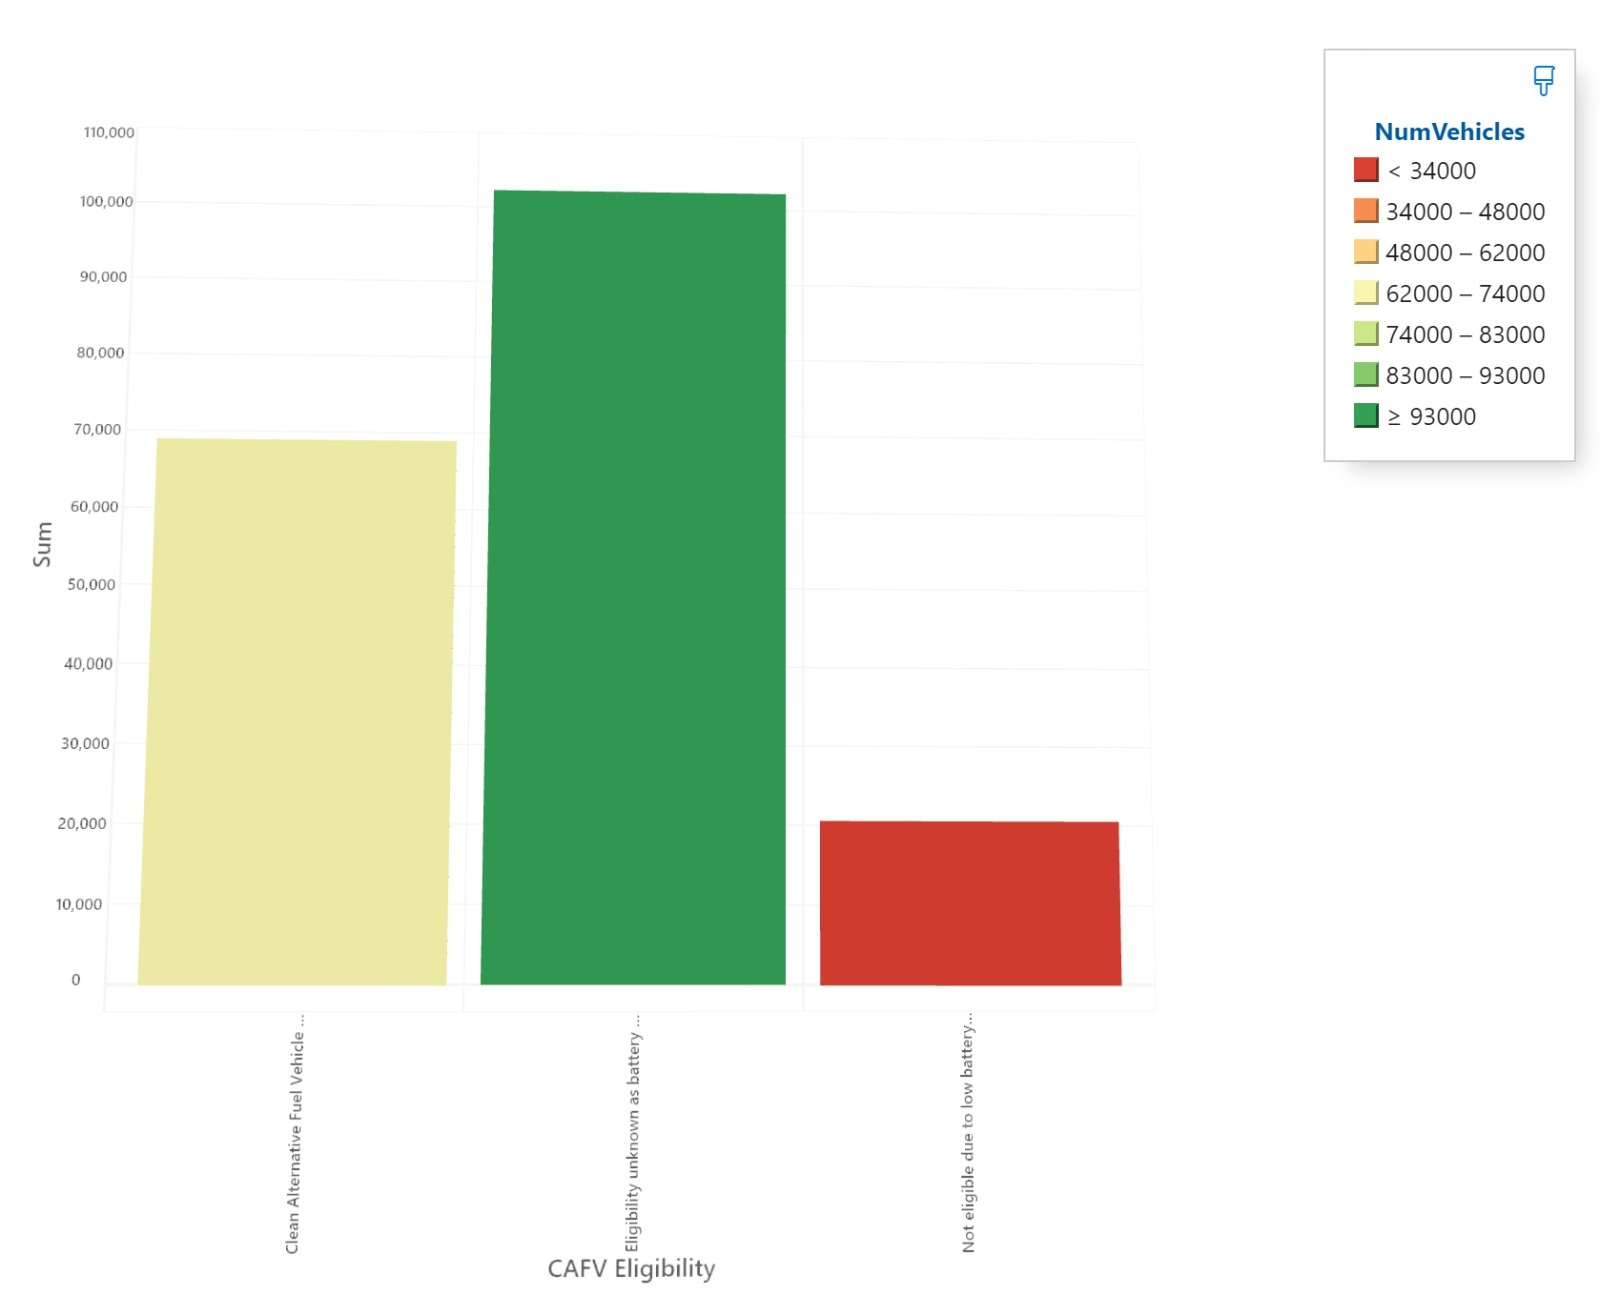